<a href="https://colab.research.google.com/github/Faaiz26/Tensor/blob/main/Case_Study_DS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("/content/drive/MyDrive/Data.csv") # reading data from MY drive

In [3]:
data.head()

,Enrollee_id,City,City_development_index,Gender,Relevent_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
City_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
Training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
Target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


* The maximum number of training hours is 336, but at least 75% of employees had finished their training within 88 hours.
* 50% of the rows have a city development index between 0.903 and 0.949, so the dataset is weighted towards the higher side with respect to this column.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Enrollee_id             19158 non-null  int64  
 1   City                    19158 non-null  object 
 2   City_development_index  19158 non-null  float64
 3   Gender                  14650 non-null  object 
 4   Relevent_experience     19158 non-null  object 
 5   Enrolled_university     18772 non-null  object 
 6   Education_level         18698 non-null  object 
 7   Major_discipline        16345 non-null  object 
 8   Experience              19093 non-null  object 
 9   Company_size            13220 non-null  object 
 10  Company_type            13018 non-null  object 
 11  Last_new_job            18735 non-null  object 
 12  Training_hours          19158 non-null  int64  
 13  Target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

In [6]:
#checking for duplicate value

data.duplicated().sum()

0

**Checking Missing values**


In [7]:
data.isnull().sum()

Enrollee_id                  0
City                         0
City_development_index       0
Gender                    4508
Relevent_experience          0
Enrolled_university        386
Education_level            460
Major_discipline          2813
Experience                  65
Company_size              5938
Company_type              6140
Last_new_job               423
Training_hours               0
Target                       0
dtype: int64

In [8]:
#in percantage

round(data.isnull().sum() / data.isnull().count() * 100, 2)

Enrollee_id                0.00
City                       0.00
City_development_index     0.00
Gender                    23.53
Relevent_experience        0.00
Enrolled_university        2.01
Education_level            2.40
Major_discipline          14.68
Experience                 0.34
Company_size              30.99
Company_type              32.05
Last_new_job               2.21
Training_hours             0.00
Target                     0.00
dtype: float64

In [9]:
data['Target'].value_counts(1) # normalizing the results

0    0.750652
1    0.249348
Name: Target, dtype: float64

**Unique Values**

In [10]:
data.nunique()

Enrollee_id               19158
City                        123
City_development_index       93
Gender                        3
Relevent_experience           2
Enrolled_university           3
Education_level               5
Major_discipline              6
Experience                   22
Company_size                  8
Company_type                  6
Last_new_job                  6
Training_hours              241
Target                        2
dtype: int64

* Dropping Enrollee_id as it has 19158 unique values and it will not provide any additional power in prediciton
*The city column as 123 unique values

In [11]:
for i in data.describe(include = ['object']).columns:
  print("Unique value in" ,i, "are :")
  print(data[i].value_counts())
  print("*" * 50)

Unique value in City are :
city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
            ... 
city_129       3
city_111       3
city_121       3
city_140       1
city_171       1
Name: City, Length: 123, dtype: int64
**************************************************
Unique value in Gender are :
Male      13221
Female     1238
Other       191
Name: Gender, dtype: int64
**************************************************
Unique value in Relevent_experience are :
Has relevent experience    13792
No relevent experience      5366
Name: Relevent_experience, dtype: int64
**************************************************
Unique value in Enrolled_university are :
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: Enrolled_university, dtype: int64
**************************************************
Unique value in Education_level are :
Graduate          11598
Masters            4361
High School        2017
Phd                 41

* The 'City' column has 123 unique categories, and the city with the highest number of employees is City 103 i.e. 4355.
* Over 90% of the employees in this dataset are males, so it is highly gender-skewed.
* Most of the employees (~70%) have relevant experience in Data Sciencei.e. 13792.
* 70% of the employees did not enroll in any of the courses.
* Most of the employees have a Bachelor's level of education (Graduation) but not more than that (~62% of the total number of employees). There are very few employees with Master's degrees and PhDs.
* Almost all the employees have previous experience (Related and Non-Related).
* ~75% of the employees are from private companies.

**Data PreProcessing**

In [12]:
data.drop(columns = 'Enrollee_id', inplace = True)

**EDA**

**Uni-Variet Analysis**

In [13]:
import seaborn as sns

In [14]:
def histogram_boxplot(data, feature, figsize=(12,7), kde = False, bins = None ):

  f2 , (ax_box2, ax_hist2) = plt.subplots(
      nrows =2,  #number of rows
      sharex = True,#sharing x-axis with sub plots
      gridspec_kw = {"height_ratios" : (0.25,0.75)},
      figsize = figsize
  )
  sns.boxplot(data=data, x = feature, ax = ax_box2, showmeans = True, color ='violet')
  sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
  )if bins else sns.histplot(data=data, x = feature, kde = kde, ax = ax_hist2)

  ax_hist2.axvline(data[feature].mean(), color = 'green',linestyle="--") #Adding mean to histogram
  ax_hist2.axvline(data[feature].median(), color = 'black', linestyle = '--')#Adding median to historam






In [15]:
data.dtypes


City                       object
City_development_index    float64
Gender                     object
Relevent_experience        object
Enrolled_university        object
Education_level            object
Major_discipline           object
Experience                 object
Company_size               object
Company_type               object
Last_new_job               object
Training_hours              int64
Target                      int64
dtype: object

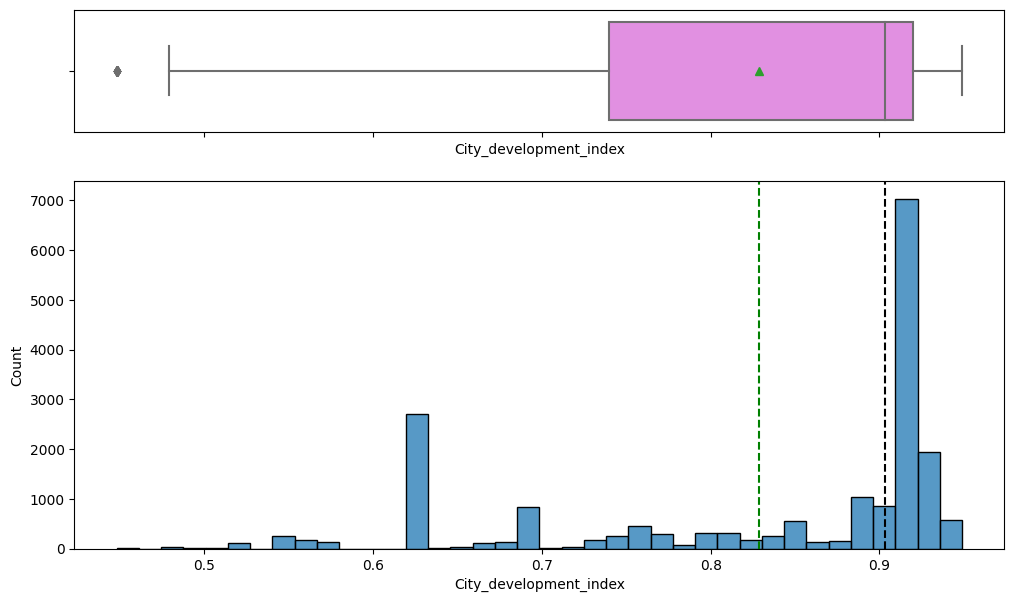

In [16]:
histogram_boxplot(data,'City_development_index')

I*From the above plot, we observe that there are many people from cities having a development index more than 0.9.

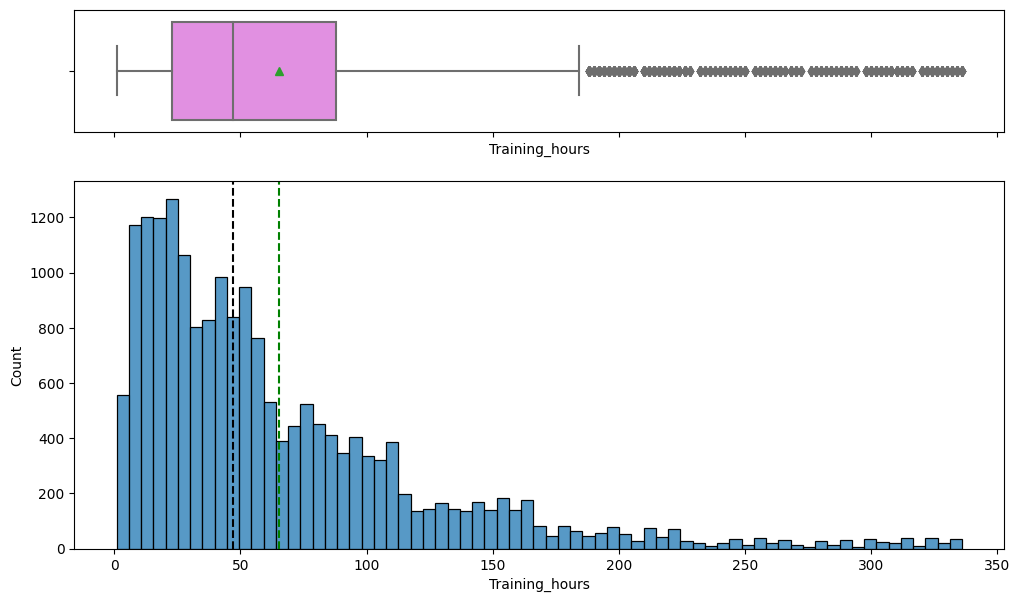

In [17]:
histogram_boxplot(data, "Training_hours")

* From the plot, we observe that the measures of central tendency with respect to training hours seem to be 70, despite a maximum value over 300 hours. So most of the people in this dataset have undergone traning for less than 100 hours.

In [18]:
#function to create labelled barplots


def labeled_barplots(data, feature, perc = False, n = None):

  total = len(data[feature]) #length of column
  count = data[feature].nunique()
  if n is None:
    plt.figure(figsize=(count + 1 , 5))
  else:
    plt.figure(n +1, 5)

  plt.xticks(rotation =90, fontsize = 15)
  ax = sns.countplot(
      data = data,
      x = feature,
      palette = "Paired",
      order = data[feature].value_counts().index[:n].sort_values())

  for p in ax.patches:
    if perc == True:
      label = "{:1f}%".format(
          100 * p.get_height()/ total
      ) # percentage of each class of the category

    else:
      label = p.get_height() # count of each level of the category

    x = p.get_x() + p.get_width() / 2 # width of the plot
    y = p.get_height()  # height of plot

    ax.annotate(
        label,
        (x,y),
        ha = 'center',
        va = 'center',
        size = 12,
        xytext = (0,5),
        textcoords = "offset points"
    )
  plt.show() #show the plot


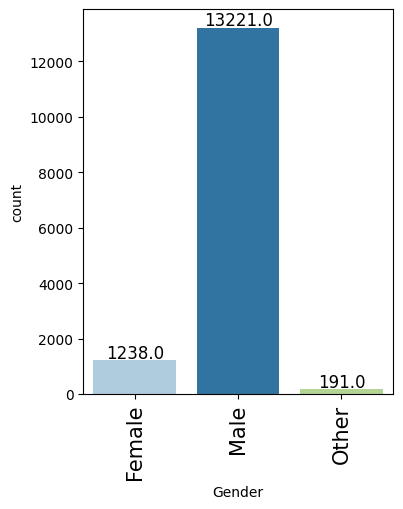

In [19]:
labeled_barplots(data,'Gender')



*   There are Far more men than women.





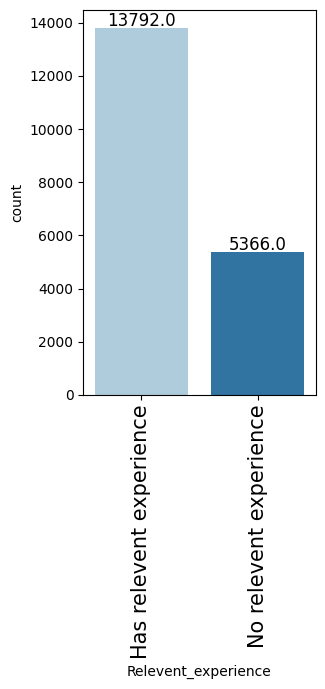

In [20]:
labeled_barplots(data,'Relevent_experience')



*  Approx 70 % of employees has relevant exp



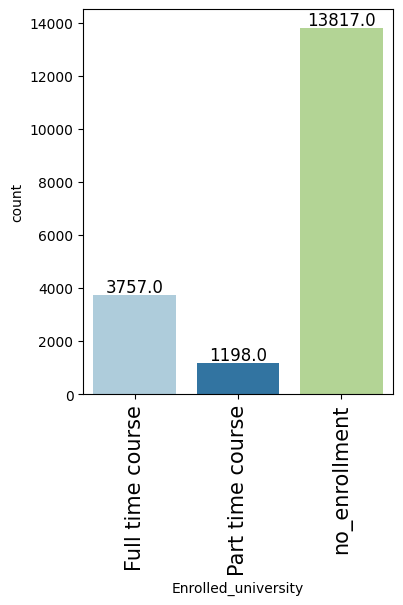

In [21]:
labeled_barplots(data,"Enrolled_university")



*   Most of the employees are not enrolled in any course.



In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    19158 non-null  object 
 1   City_development_index  19158 non-null  float64
 2   Gender                  14650 non-null  object 
 3   Relevent_experience     19158 non-null  object 
 4   Enrolled_university     18772 non-null  object 
 5   Education_level         18698 non-null  object 
 6   Major_discipline        16345 non-null  object 
 7   Experience              19093 non-null  object 
 8   Company_size            13220 non-null  object 
 9   Company_type            13018 non-null  object 
 10  Last_new_job            18735 non-null  object 
 11  Training_hours          19158 non-null  int64  
 12  Target                  19158 non-null  int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 1.9+ MB


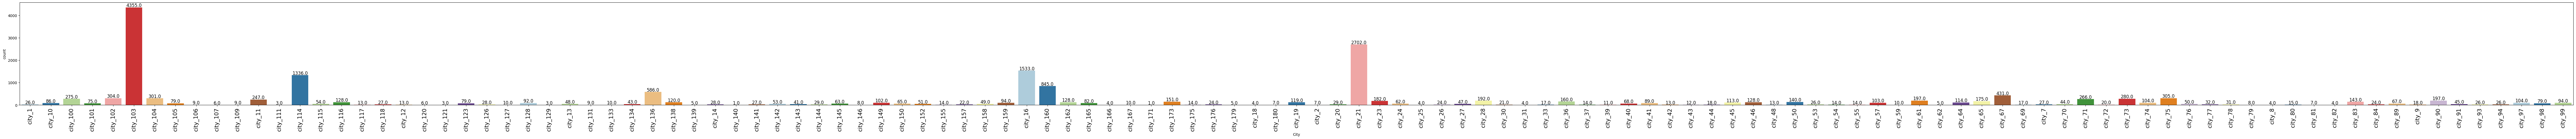

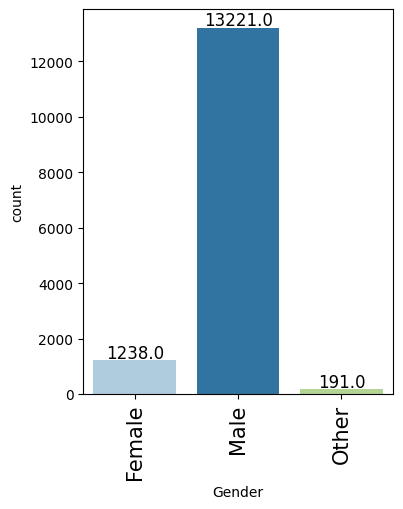

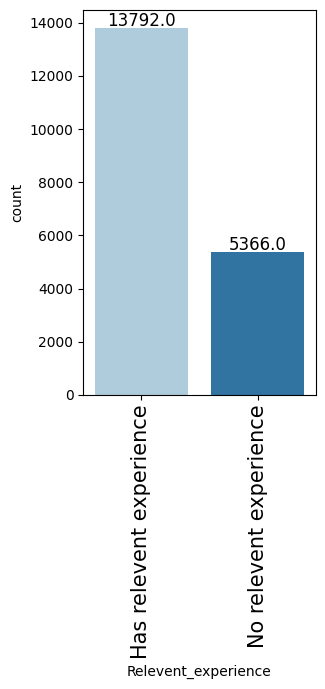

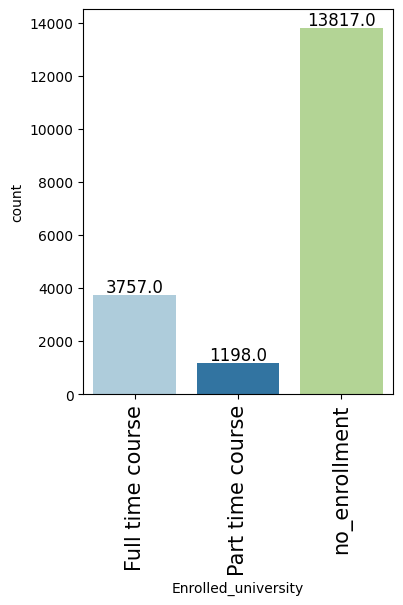

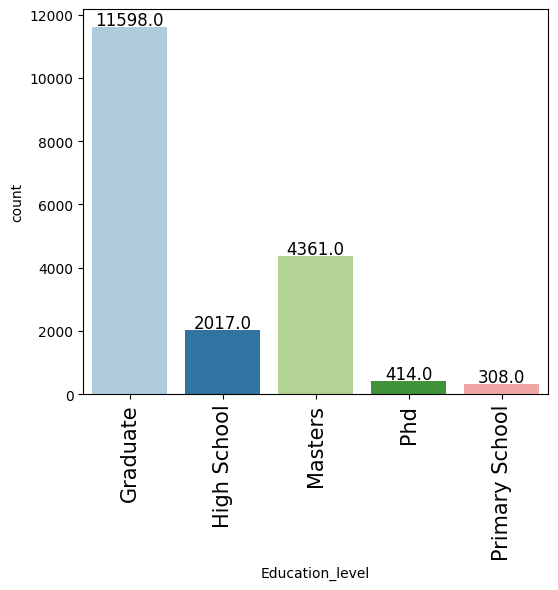

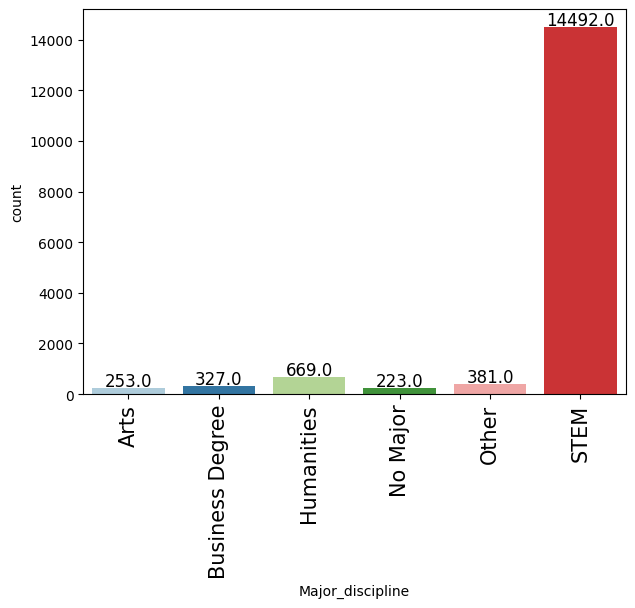

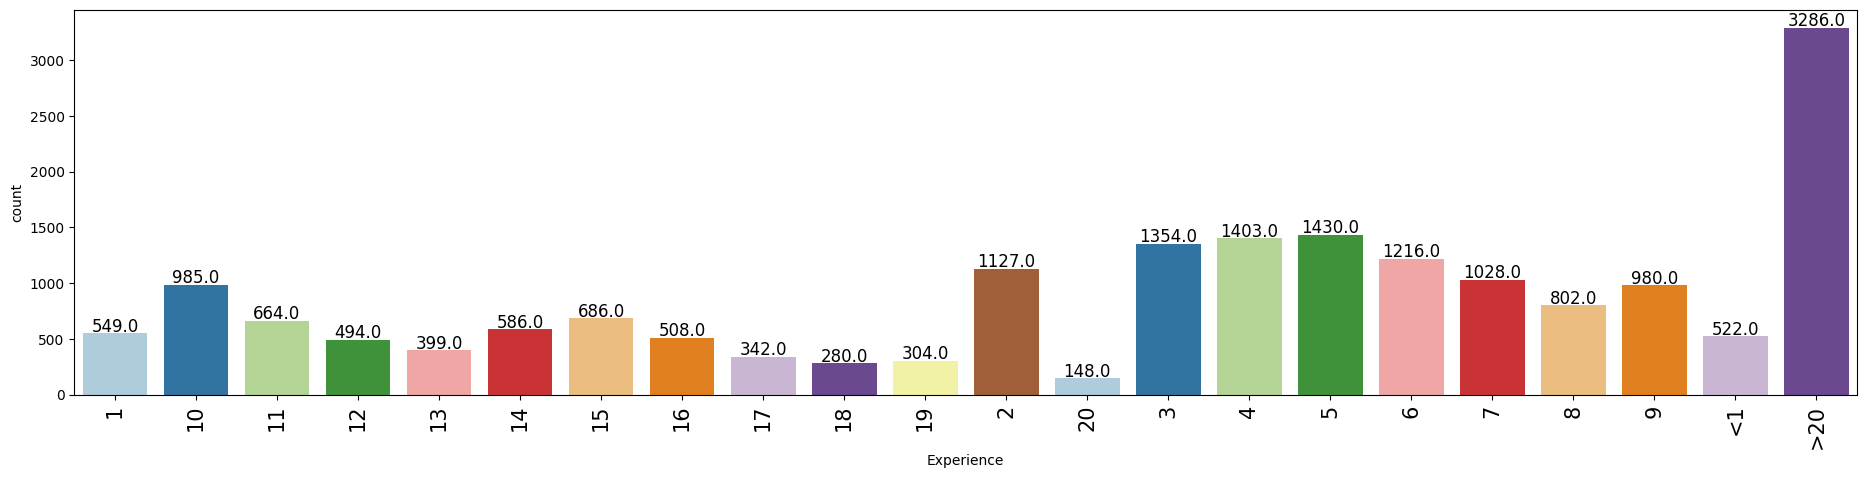

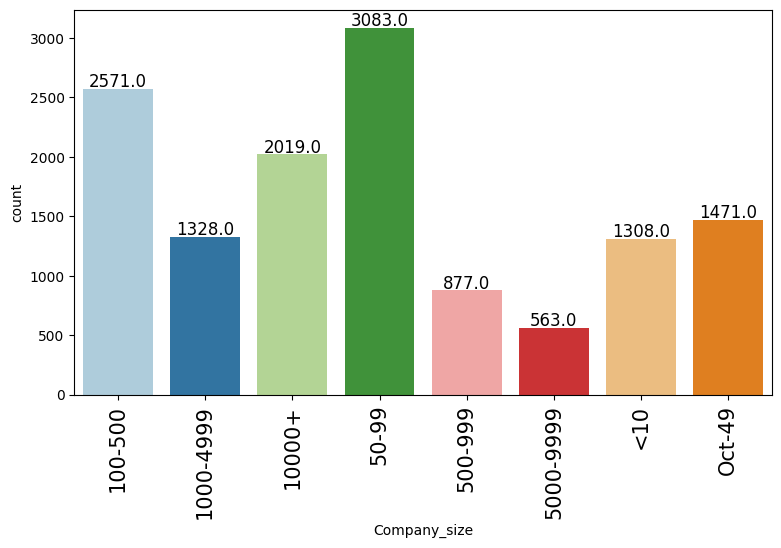

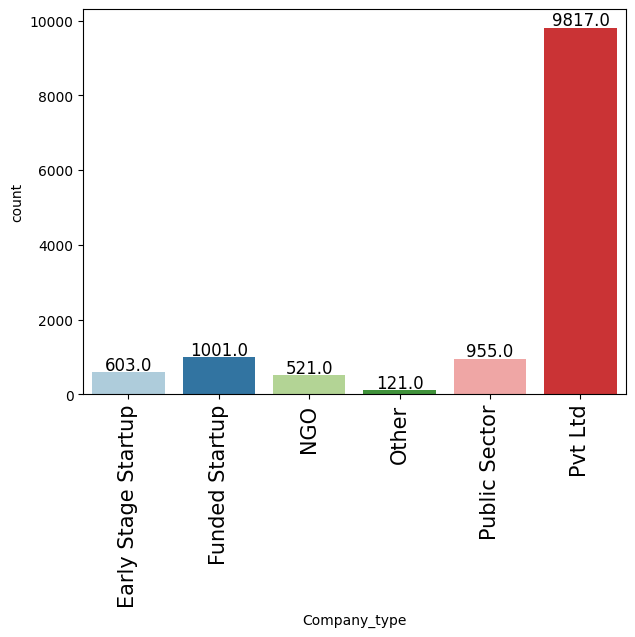

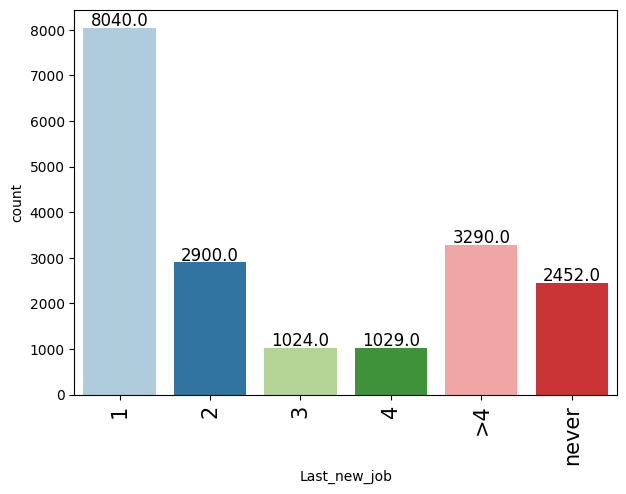

In [23]:
a = ['City','Gender','Relevent_experience','Enrolled_university','Education_level','Major_discipline','Experience','Company_size','Company_type','Last_new_job']

for i in a:
  labeled_barplots(data,i)

0    14381
1     4777
Name: Target, dtype: int64


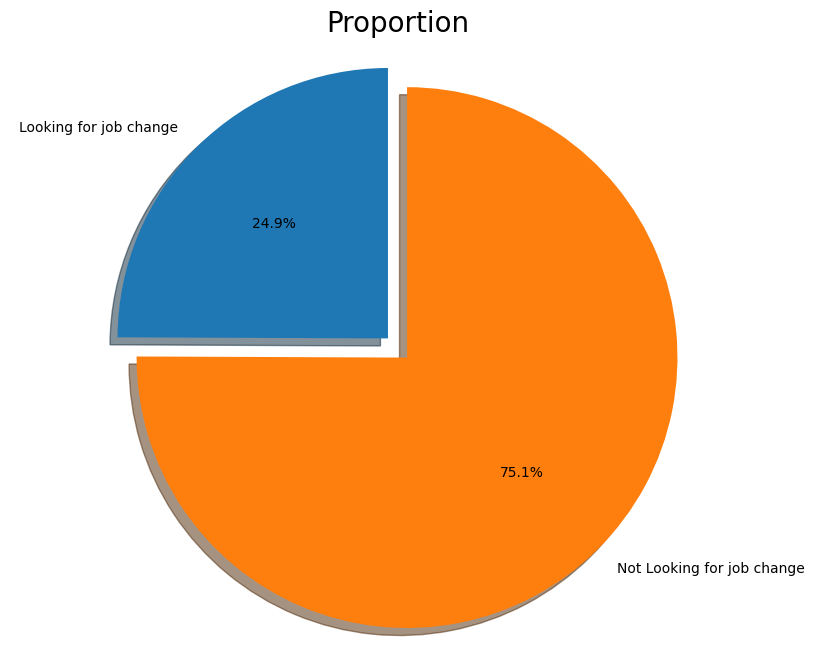

In [24]:
print(data.Target.value_counts())
labels = 'Looking for job change', 'Not Looking for job change'

sizes = [data.Target[data['Target']==1].count(),data.Target[data['Target']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

* This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~25% of the employees in this dataset are actually looking for a job change.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

**Bivariate Analysis**

In [25]:
## Function to plot distribution

def distribution_plot_wrt_target(data, predictor, target):

  fig , axs = plt.subplots(2,2, figsize = (12,10))

  target_uniq = data[target].unique()

  axs[0,0].set_title("Distribution of target for target = " + str(target_uniq[0]))

  sns.histplot(
      data = data[data[target] == target_uniq[0]],
      x = predictor,
      kde = True,
      ax = axs[0,0],
      color = 'teal'
      )

  axs[0,1].set_title("Distribution of target for target = " + str(target_uniq[1]))

  sns.histplot(
      data = data[data[target] == target_uniq[1]],
      x = predictor,
      kde = True,
      ax = axs[0,1],
      color = "orange"
  )

  axs[1,0].set_title('BoxPlot with respect to target')
  sns.boxplot(
      data = data,
      x = target,
      y = predictor,
      ax = axs[1,0],
      palette = 'gist_rainbow'
)

  axs[1,1].set_title('BoxPlot without Outliers w.r.t target')
  sns.boxplot(
      data = data,
      x = target,
      y = predictor,
      ax = axs[1,1],
      showfliers = False,
      palette = "gist_rainbow"
  )

  plt.tight_layout()

  plt.show()

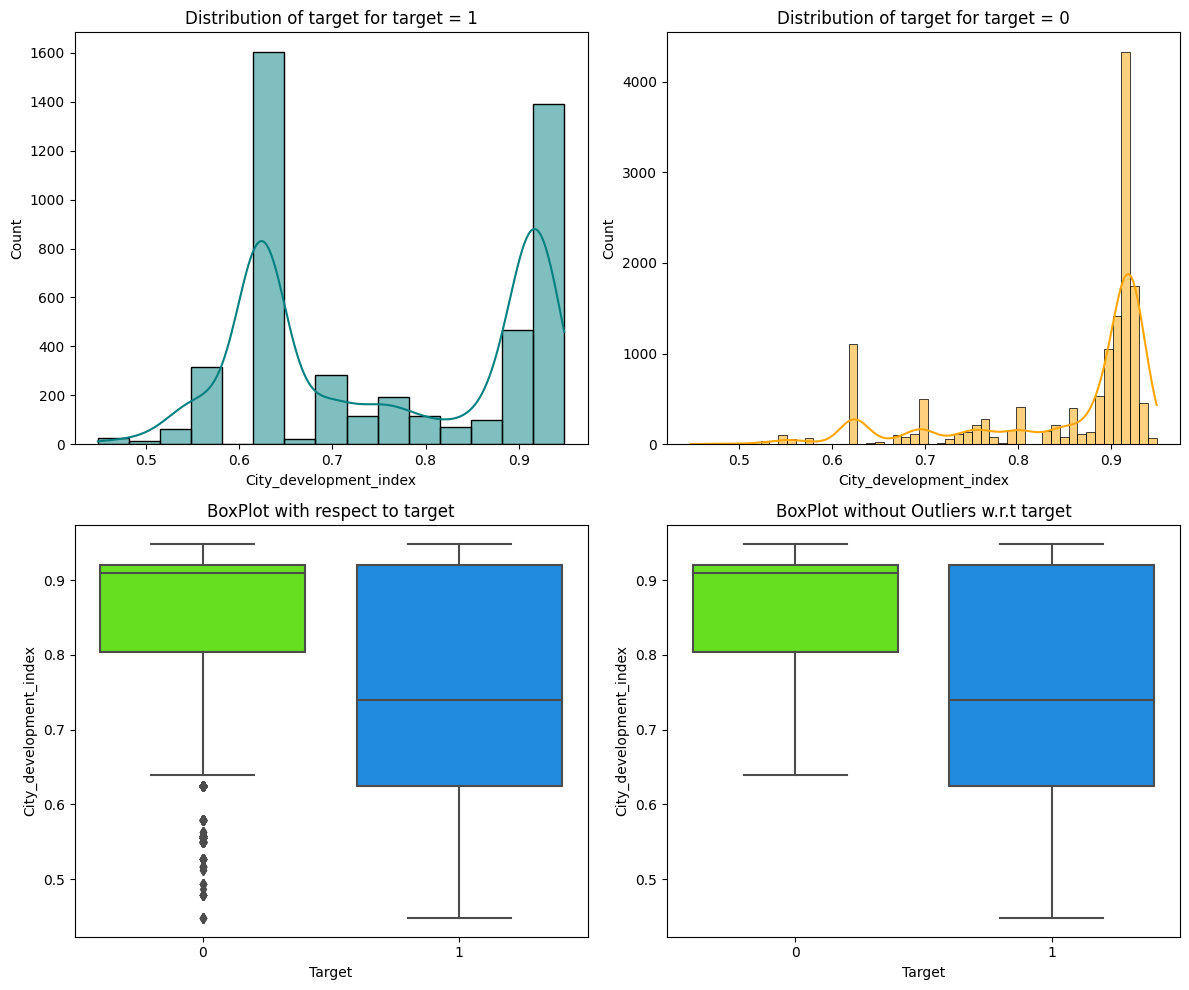

In [26]:
distribution_plot_wrt_target(data, "City_development_index","Target")



1.   From the above plot, we observe that employees from cities having a development index over 0.9, are not willing to switch their jobs.



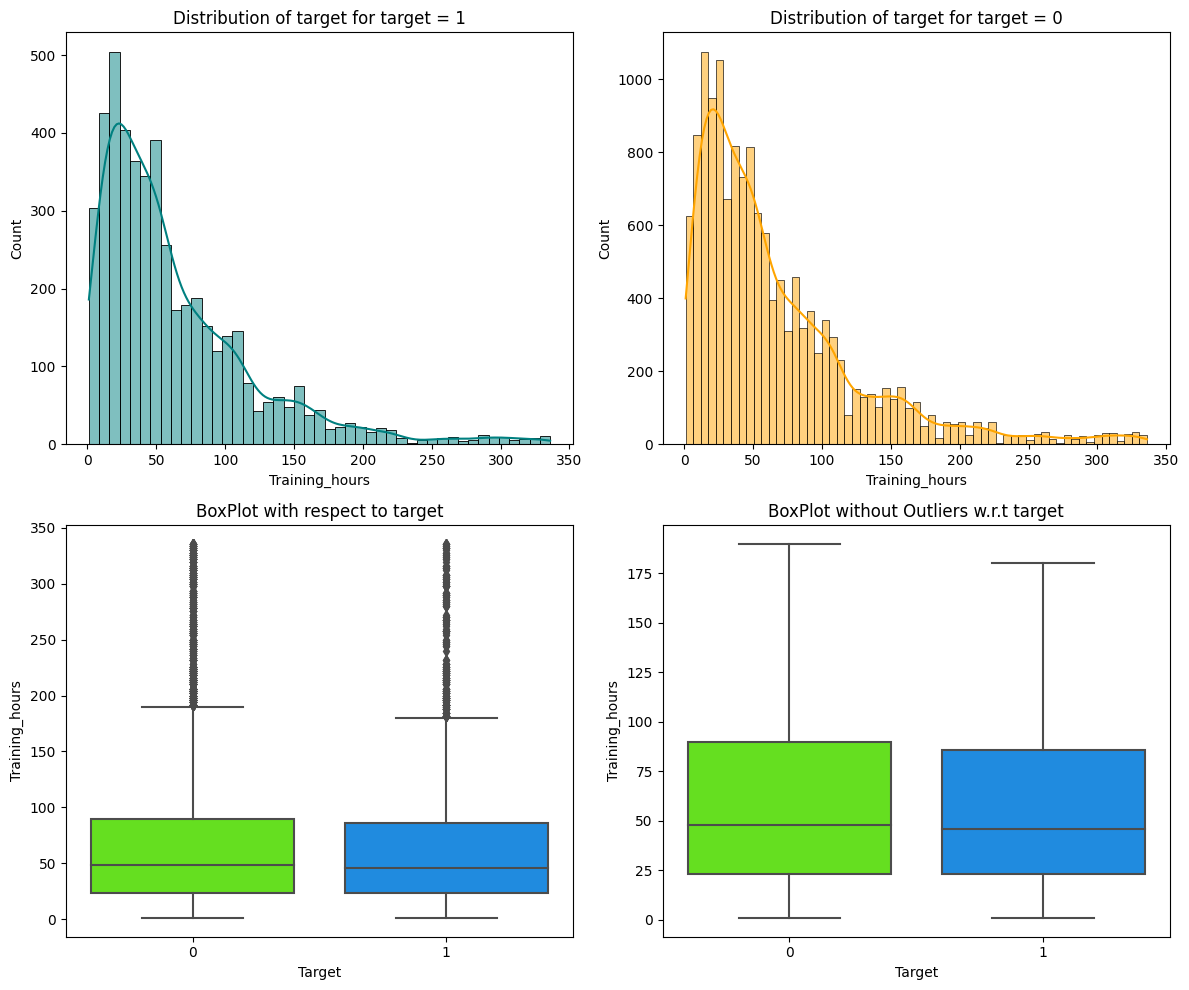

In [27]:
distribution_plot_wrt_target(data, "Training_hours", "Target")



*   We observe that the distribution of the training hours with respect to the target variable is rightly skewed, and from the box plot for both classes the median traning hours are around 50.



In [28]:
# stacked bar plots

def stacked_barplot(data , predictor, target):


  count = data[predictor].nunique()
  sorter = data[target].value_counts().index[-1]

  tab1 = pd.crosstab(data[predictor], data[target], margins = True).sort_values(by = sorter, ascending = False)

  print(tab1)

  print("-" * 120)

  tab = pd.crosstab(data[predictor], data[target], normalize = 'index').sort_values(by = sorter, ascending = False)

  tab.plot(kind = 'bar', stacked = True, figsize = (count + 1, 5 ))

  plt.legend(
      loc = "lower left",
      frameon = False
  )

  plt.legend(
      loc = "upper left",
      bbox_to_anchor = (1,1)
  )


plt.show()

Target      0     1    All
Gender                    
All     11262  3388  14650
Male    10209  3012  13221
Female    912   326   1238
Other     141    50    191
------------------------------------------------------------------------------------------------------------------------


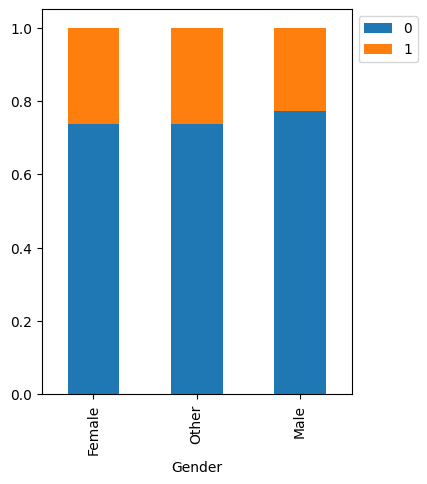

In [29]:
stacked_barplot(data, 'Gender', "Target")


From above plot, it is observed that likelihood to change the job is not doesnot depend on Gender

Target                       0     1    All
Relevent_experience                        
All                      14381  4777  19158
Has relevent experience  10831  2961  13792
No relevent experience    3550  1816   5366
------------------------------------------------------------------------------------------------------------------------


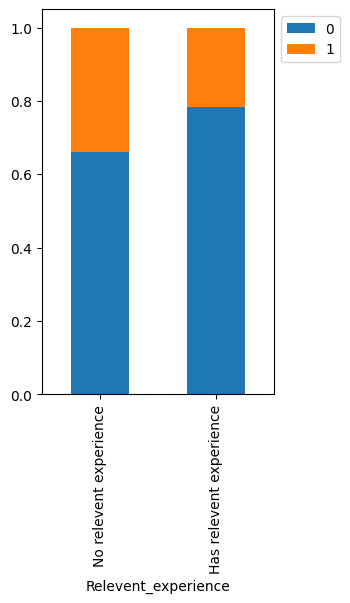

In [30]:
stacked_barplot(data,"Relevent_experience","Target")

Employee with No relevelent experience most likely to switch job

Target                   0     1    All
Enrolled_university                    
All                  14118  4654  18772
no_enrollment        10896  2921  13817
Full time course      2326  1431   3757
Part time course       896   302   1198
------------------------------------------------------------------------------------------------------------------------


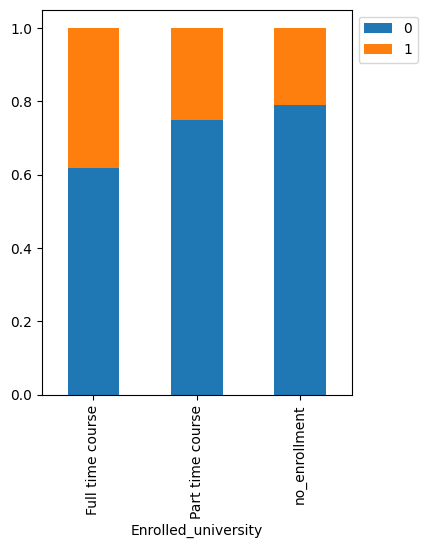

In [31]:
stacked_barplot(data, "Enrolled_university","Target")

Target               0     1    All
Education_level                    
All              14025  4673  18698
Graduate          8353  3245  11598
Masters           3426   935   4361
High School       1623   394   2017
Phd                356    58    414
Primary School     267    41    308
------------------------------------------------------------------------------------------------------------------------


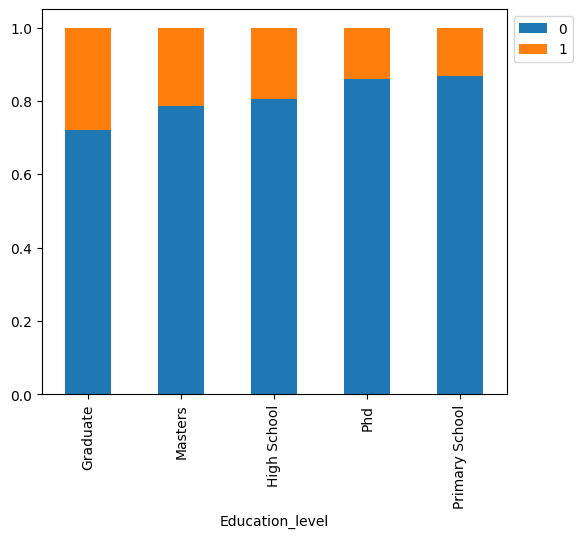

In [32]:
stacked_barplot(data, "Education_level", "Target")

Target                0     1    All
Major_discipline                    
All               12117  4228  16345
STEM              10701  3791  14492
Humanities          528   141    669
Other               279   102    381
Business Degree     241    86    327
No Major            168    55    223
Arts                200    53    253
------------------------------------------------------------------------------------------------------------------------


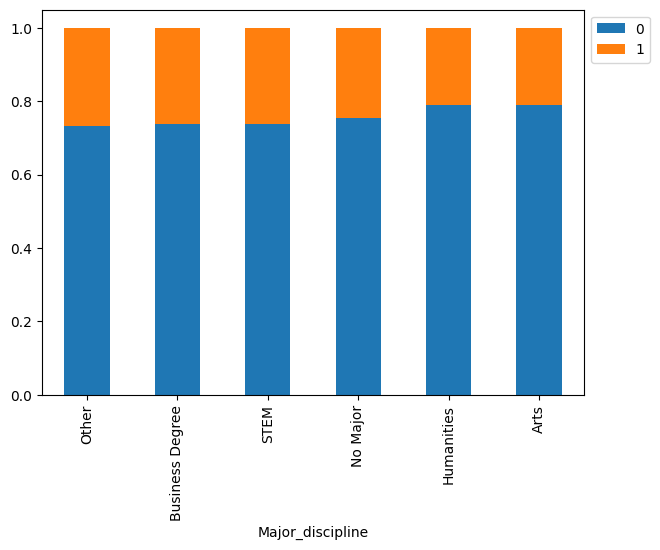

In [34]:
stacked_barplot(data, "Major_discipline", "Target")

Target          0     1    All
Experience                    
All         14339  4754  19093
>20          2783   503   3286
3             876   478   1354
4             946   457   1403
5            1018   412   1430
2             753   374   1127
6             873   343   1216
7             725   303   1028
<1            285   237    522
1             316   233    549
9             767   213    980
10            778   207    985
8             607   195    802
11            513   151    664
15            572   114    686
14            479   107    586
12            402    92    494
13            322    77    399
16            436    72    508
17            285    57    342
19            251    53    304
18            237    43    280
20            115    33    148
------------------------------------------------------------------------------------------------------------------------


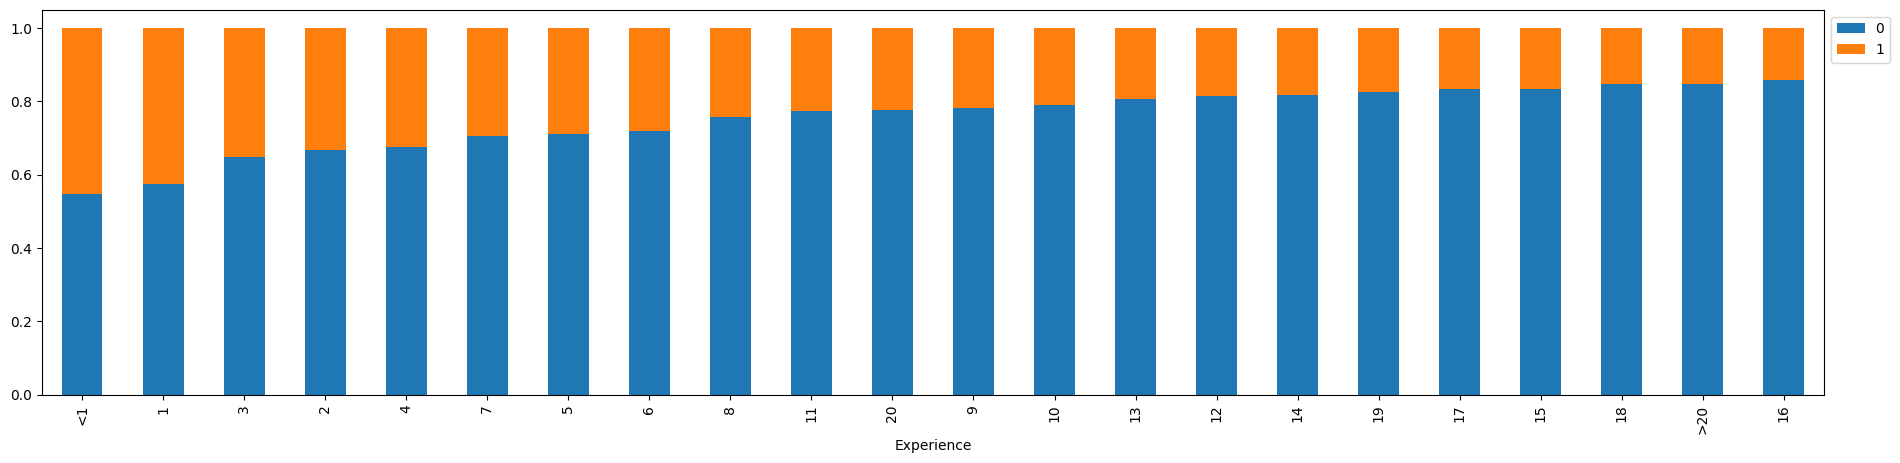

In [37]:
stacked_barplot(data, "Experience", "Target")

**From the above plot, it's clear that employees having a work experience of less than 3 years are trying to switch their jobs.**

Target            0     1    All
Last_new_job                    
All           14112  4623  18735
1              5915  2125   8040
never          1713   739   2452
2              2200   700   2900
>4             2690   600   3290
3               793   231   1024
4               801   228   1029
------------------------------------------------------------------------------------------------------------------------


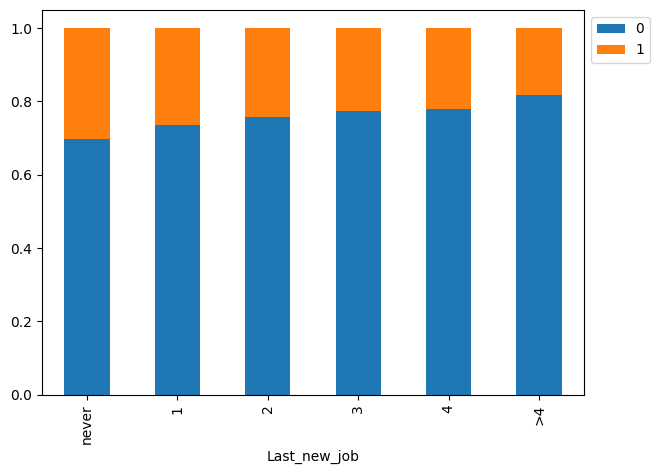

In [36]:
stacked_barplot(data, "Last_new_job", "Target")

**Employees who have never switched their job before are the most likely to be looking for a job change.**